## 1. McCulloch–Pitts neuron 


### a) Defining the function

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Setting up X, weights and the output sign function
X = np.array([-1, -1, -1])
W = np.array([3,2,2])

Y = np.sign(np.dot(W.transpose(), X))


### b) Truth table of x1, x2

In [87]:
combinations = [(1,1), (1,-1), (-1,1), (-1,-1)]
for combination in combinations:
    x1 = combination[0]
    x2 = combination[1]
    X = np.array([-1, x1, x2])
    Y = np.sign(np.dot(W.transpose(), X))
    print("for x1")
    print(x1)
    print("and x2:")
    print(x2)
    print("  - for x1: {}, x2: {}\n    Y: {}".format(x1, x2, Y))

  - for x1: 1, x2: 1
    Y: 1
  - for x1: 1, x2: -1
    Y: -1
  - for x1: -1, x2: 1
    Y: -1
  - for x1: -1, x2: -1
    Y: -1


### Summary

- Trying out all combinations of x1, x2 show us that whenever there is a (-1/False) then output is -1/False, 
- Only when both inputs are (1/True) then output is (1/True)
- Function is logical AND

-----------------------------------------------------

## 2. Activation Functions

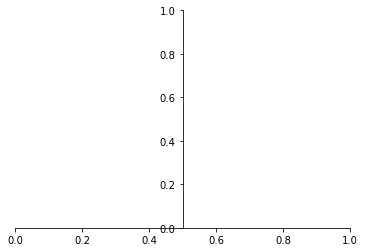

In [66]:
# Defining the plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Defining points
x = np.linspace(-5,5,100)

### a) Sigmoid function

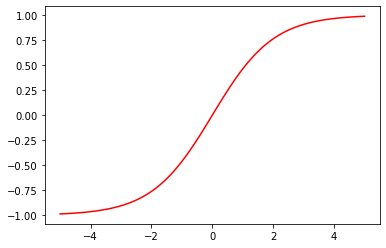

In [74]:
# Defining param (a)
a = 1

# Defining the function
y1 = 2/(1+np.exp(-a*x)) - 1

# plot the function
plt.plot(x, y1, 'r')

# show the plot
plt.show()

### b) tanh function

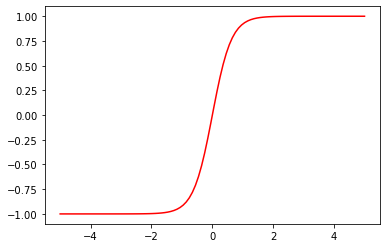

In [59]:
# Defining param (a)
a = 0.4

# Defining the function
y2 = np.tanh(4*a*x)

# plot the function
plt.plot(x,y2, 'r')

# show the plot
plt.show()

### c) Piecewise linear function

In [ ]:
# Defining param (a)
a = 10

# Defining the piecewise functions (over 4 parts)
y3 = np.piecewise(x, [x > -1/a, x < 1/a, x <= -1/a, x >= 1/a], [lambda x: a*x, lambda x: a*x, -1, 1])

# plot the function
plt.plot(x,y3, 'r')

# show the plot
plt.show()

### Summary

Choosing the parameter (a) to be large would push all the mentioned functions to be step-wise function. Parameter (a) functions as a threshold and controls the sensitivity of the function to 'fire' or no.


---------------------------------------------------------------------------------------------

## 2. Rosenblatt’s perceptron



### a. Generating the datasets

In [72]:
import numpy as np
from numpy import random

class Dataset:
    def __init__(self, dataset_size):
        self.dataset_size = dataset_size

    def generate_input_vector(self):
        x1, x2 = random.normal(0, 1, size=2)
        return np.array([-1, x1, x2])

    def evaluate_desired_output(self,x1,x2):
        if x2 >= (0.5 - x1):
            return 1
        else:
            return -1

    def generate_dataset(self):
        dataset = []
        for i in range(self.dataset_size):
            input_vector = self.generate_input_vector()
            desired_output = self.evaluate_desired_output(input_vector[1], input_vector[2])
            dataset.append((input_vector, desired_output))
        return dataset

test_dataset = Dataset(3).generate_dataset()

### b. Defining neuron function, weight updating function and learning rate

In [92]:
# Setting up X, weights and the output sign function

DATASET_SIZE = 1000

class McPittsNeuron:
    LEARNING_RATE = 0.2
    MAX_EPOCHS = 200

    def __init__(self, initial_weight):
        self.weight_vector = initial_weight
        
    def reset_weight(self):
        self.weight_vector = np.array([3,2,2])

    # Weight and input_vector are vectors (Hamada Helal)
    def evaluate_output(self, input_vector):
        return np.sign(np.dot(self.weight_vector.transpose(), input_vector))

    def evaluate_and_update_weight(self, input_vector, desired_output):
        neuron_output = self.evaluate_output(input_vector)
        # print("desired output: {}, neuron output: {}".format(desired_output, neuron_output))
        multiplying_factor = LEARNING_RATE* (desired_output - neuron_output)
        self.weight_vector = np.add(self.weight_vector, np.multiply(multiplying_factor, input_vector))
        return self.weight_vector

    def matching_weights(self, w1, w2):
        print("Comparing {} with {}".format(w1, w2))
        each_element_check = [format(e1, ".3f") == format(e2, ".3f") for e1, e2 in zip(w1, w2)]
        return all(each_element_check)

    def run_epoch(self, training_dataset):
        for input_vector, desired_output in training_dataset:
            # print("input_vector: {}".format(input_vector))
            prev_weight = self.weight_vector
            self.evaluate_and_update_weight(input_vector, desired_output)
            # print("prev weight: {}, updated_weight: {}".format(prev_weight, self.weight_vector))
            # print("-------------------------------\n")
        return self.weight_vector

    def run_training(self, training_dataset):
        epoch_counter = 0
        while True:
            print("==================== epoch {} ========================".format(epoch_counter))
            pre_epoch_weight = self.weight_vector
            self.run_epoch(training_dataset)
            if self.matching_weights(pre_epoch_weight, self.weight_vector) or epoch_counter == self.MAX_EPOCHS:
                break
            else:
                epoch_counter += 1
        return self.weight_vector
    
    def validate(self, validation_dataset):
        successes = 0
        in_out = []
        for input_vector, desired_output in validation_dataset:
            trained_neuron_output = self.evaluate_output(input_vector)
            in_out.append({"input_vector": input_vector, "desired_output": desired_output, "trained_output": trained_neuron_output})
            if trained_neuron_output == desired_output:
                successes += 1
        success_rate = (successes / VALIDATION_DATASET_SIZE) * 100
        print("Successes: {}/{} ({}%)".format(successes, VALIDATION_DATASET_SIZE, success_rate))
        return in_out

initial_weight = np.array([3,2,2])
mc_pitt_neuron = McPittsNeuron(initial_weight)

training_dataset = Dataset(DATASET_SIZE).generate_dataset()
trained_weight = mc_pitt_neuron.run_training(training_dataset)

==================== epoch 0 ========================
Comparing [3 2 2] with [1.4        3.12467516 3.2420997 ]
==================== epoch 1 ========================
Comparing [1.4        3.12467516 3.2420997 ] with [1.8        3.58958737 3.81445494]
==================== epoch 2 ========================
Comparing [1.8        3.58958737 3.81445494] with [1.8        4.10908578 4.15157601]
==================== epoch 3 ========================
Comparing [1.8        4.10908578 4.15157601] with [1.8        4.54144994 4.33305112]
==================== epoch 4 ========================
Comparing [1.8        4.54144994 4.33305112] with [2.2        4.3745875  4.39483965]
==================== epoch 5 ========================
Comparing [2.2        4.3745875  4.39483965] with [2.2        4.84022875 4.57324735]
==================== epoch 6 ========================
Comparing [2.2        4.84022875 4.57324735] with [2.2        4.91664374 4.98515091]
==================== epoch 7 ========================


### c. Validating through validation dataset

In [93]:
VALIDATION_DATASET_SIZE = 5000

validation_dataset = Dataset(VALIDATION_DATASET_SIZE).generate_dataset()
validation_results = mc_pitt_neuron.validate(validation_dataset)

Successes: 4993/5000 (99.86%)


### d. Plotting the data

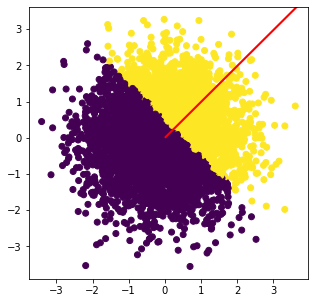

In [94]:
fig, ax = plt.subplots(figsize=(5, 5))

input_x = [datapoint["input_vector"] for datapoint in validation_results]
x1 = [x[1] for x in input_x]
x2 = [x[2] for x in input_x]
trained_y = [datapoint["trained_output"] for datapoint in validation_results]

ax.scatter(x1, x2, c=trained_y, label=trained_y)
ax.quiver(0,0, trained_weight[1], trained_weight[2], scale=0.5, color='r')

# ax.set_title('XOR problem')


-----------
**TODOS:**

- [x] Change to OOP to be able to reuse the neuron code
- [x] Add comments             DONE
- [x] (c) Test on new dataset  DONE
- [x] (d) plot                 DONE